## Data loading

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# First glimpse of all the available movies in the dataset

column_movies = ["film_id", "movie_id", "title", "release_date", "gross_revenue", "duration_min", "language", "country", "categories"]

movies_df = pd.read_csv('./Data/MovieSummaries/movie.metadata.tsv', sep='\t', header=None, names=column_movies)
movies_df.head()

,film_id,movie_id,title,release_date,gross_revenue,duration_min,language,country,categories
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [31]:
# Example of local analysis (maybe useful later)

korean_movies = movies_df[movies_df['country'].str.contains('Korea')]
korean_movies.head()

,film_id,movie_id,title,release_date,gross_revenue,duration_min,language,country,categories
119,3873713,/m/0b4f1s,Lee Dae-ro Can't Die,2005-08-18,4736013.0,108.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea""}","{""/m/02kdv5l"": ""Action"", ""/m/01z4y"": ""Comedy""}"
124,24282217,/m/07sb8_t,The Naked Kitchen,2009-02-05,638181.0,102.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea""}","{""/m/03q4nz"": ""World cinema"", ""/m/01t_vv"": ""Co..."
197,748616,/m/03813g,"Spring, Summer, Fall, Winter... and Spring",2003-08-14,9524745.0,95.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea"", ""/m/0345h"": ""Germa...","{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
220,20119316,/m/04yfw36,Eoudong,1985-09-28,NaN,110.0,{},"{""/m/06qd3"": ""South Korea""}","{""/m/07s9rl0"": ""Drama""}"
300,35567084,/m/0j9n5v7,I AM.,2012-05-15,NaN,130.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea""}","{""/m/0jtdp"": ""Documentary""}"


In [32]:
# Dataframe of all the characters in the movies

column_characters = ["film_id", "movie_id", "release_date", "character", "born_date", "gender", "height", "ethnicity", "actor_name", "actor_age_at_movie_release", "actor_map_ID","character_ID","actor_ID"]

character_df = pd.read_csv('./Data/MovieSummaries/character.metadata.tsv', sep='\t', header=None, names = column_characters)
character_df.sample(10)

,film_id,movie_id,release_date,character,born_date,gender,height,ethnicity,actor_name,actor_age_at_movie_release,actor_map_ID,character_ID,actor_ID
193818,5795788,/m/0f52ld,2007-08-24,NaN,1975-02-03,M,NaN,/m/044038p,Terry Chen,32.0,/m/03js7j2,NaN,/m/02r68t4
404968,163454,/m/015qr6,1973-02-14,NaN,NaN,NaN,NaN,NaN,William Hansen,NaN,/m/0cg05yy,NaN,/m/042wq3h
399092,2610276,/m/07rjfs,2006,NaN,NaN,M,NaN,NaN,Arcadiy Golubovich,NaN,/m/0cg249x,NaN,/m/09sjzmr
163339,11665498,/m/02rn7b_,2007-11,NaN,NaN,M,NaN,NaN,Ferran Terraza,NaN,/m/0h2p27l,NaN,/m/0b_h0s8
318539,26724867,/m/0bmhtvs,1966,NaN,1938-08-26,F,NaN,NaN,Francine York,27.0,/m/0gcxgf6,NaN,/m/0c0klk0
248620,31905391,/m/0gvrws1,2012-08-03,Lori,1973-07-26,F,1.7,/m/02w7gg,Kate Beckinsale,39.0,/m/0gv_890,/m/0gwhny9,/m/01pk8v
312705,19649081,/m/04mxxpr,1990-10-25,NaN,1966-02-06,M,NaN,NaN,Kenji Ōtsuki,24.0,/m/0mzr3xv,NaN,/m/02qtcrt
56376,28686989,/m/0cz7_4w,1990-05-25,Hannah Coke,1952-12-20,F,1.7,NaN,Jenny Agutter,37.0,/m/0gdp5p6,/m/0h26jrl,/m/01pcql
256242,12159097,/m/02vrsdr,1973,NaN,NaN,F,NaN,NaN,Tsippi Shavit,NaN,/m/0kpcfd9,NaN,/m/0kpcms4
355894,24008637,/m/0djc8sz,1936,NaN,1866-06-26,M,NaN,NaN,Josef Swickard,NaN,/m/0djcxky,NaN,/m/0c3ts7


In [33]:
# List of different actors 
actors = character_df['actor_name'].unique()

# Number of actors per movie  
films = character_df.groupby('movie_id').actor_name.count()

# Number of characters per movie 
char = character_df.groupby('movie_id').character.count()

We may look at the frequency of different actors (nb of movies/year), look at the histogram of number of times each actor played (distrib), look at when the age started (distrib), ...

## Frequency of presence in movies per year 

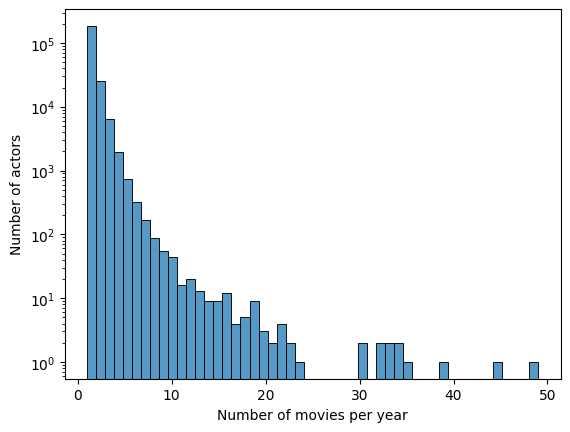

In [34]:
character_df['release_date'] = pd.to_datetime(character_df['release_date'], errors='coerce')

frequency_df = character_df.groupby(['actor_name', character_df['release_date'].dt.year]).size().reset_index(name='movie_count')
sns.histplot(frequency_df['movie_count'], bins = 50, log = True)
plt.ylabel("Number of actors")
plt.xlabel("Number of movies per year")
plt.show()

Possible limitations of the graph : outliers (we may look at who they are) and does a huge frquency over one year is better than a constant lower frequency ?  

In [35]:
frequency_max = frequency_df.sort_values(by='movie_count', ascending=False)
top5_frequency = frequency_max.head(5)
print(top5_frequency)

             actor_name  release_date  movie_count
180202  Roscoe Arbuckle        1914.0           49
156501     Oliver Hardy        1916.0           45
76332      Harold Lloyd        1919.0           39
180201  Roscoe Arbuckle        1913.0           35
32608   Charlie Chaplin        1914.0           34


When we search for all these actors, we can see that they are all from the beginning of the movie industry (1910s, early 1920s) when the movies were quite short and silent, so the artistic approach was way more simplified as today. In fact, Roscoe Arbuckle worked as the same time as an actor, a screenwriter and a producer. 

By highlighting that, we could assess that taking into account the period at which the movies were produced is critical. 

## Number of movies per actor

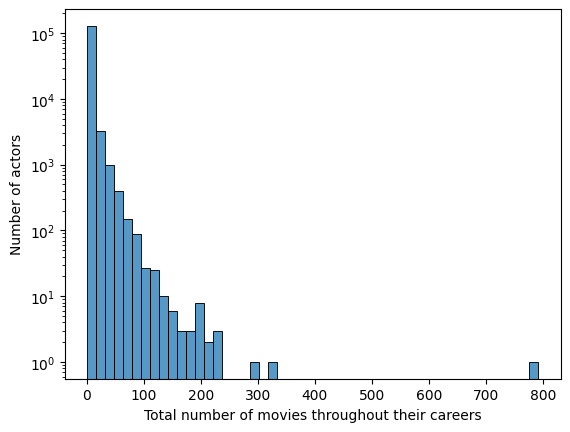

In [36]:
actor_total_movie_counts = character_df.groupby('actor_name').size().reset_index(name='total_movie_count')

sns.histplot(actor_total_movie_counts['total_movie_count'], bins=50, log = True, kde=False)
plt.ylabel("Number of actors")
plt.xlabel("Total number of movies throughout their careers")
plt.show()

Who have been involved in 791 movies ?!

In [37]:
sorted_actors = actor_total_movie_counts.sort_values(by='total_movie_count', ascending=False)
top_5_actors = sorted_actors.head(5)
print(top_5_actors)

               actor_name  total_movie_count
86136           Mel Blanc                791
90201  Mithun Chakraborty                328
95972        Oliver Hardy                299
90474            Mohanlal                234
90355          Moe Howard                225


Ok, interesting, in fact Mel Blanc is involved in all the movies because he was the voice of the well-known duo of Tom and Jerry and other less known productions where he acted as a 'double-role'. And the code does not take into account that it represents 'one' role. Here is the corrected version :

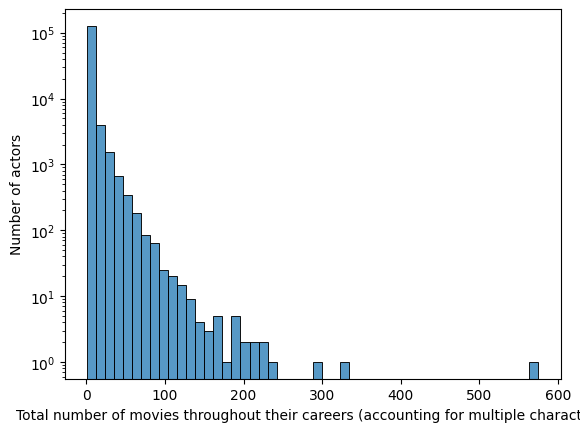

In [38]:
actor_movie_comb = character_df.groupby(['actor_name', 'movie_id']).size().reset_index(name = 'appearance_count')

actor_total_movie_counts_corrected = actor_movie_comb.groupby('actor_name').size().reset_index(name = 'total_movie_count')
sns.histplot(actor_total_movie_counts_corrected['total_movie_count'], bins=50, log=True)
plt.ylabel("Number of actors")
plt.xlabel("Total number of movies throughout their careers (accounting for multiple characters)")
plt.show()

In [39]:
sorted_actors_corrected = actor_total_movie_counts_corrected.sort_values(by='total_movie_count', ascending=False) 
top_5_actors_corrected = sorted_actors_corrected.head(5)
print(top_5_actors_corrected)

               actor_name  total_movie_count
86136           Mel Blanc                575
90201  Mithun Chakraborty                328
95972        Oliver Hardy                299
90474            Mohanlal                234
79708           Mammootty                225


Even after correction, the top 4 remains still but another indian actor joins the leaderboard : Mammootty. In fact, we may have to consider productions locally and by period too, because the leaderboard is exclusively from America in the early ages of cinema and from India nowadays for example.

## Number of different characters interpreted

Another possibility would be to consider whether the actor is able to interpret a wide range of roles or to act as the same character all his career. 

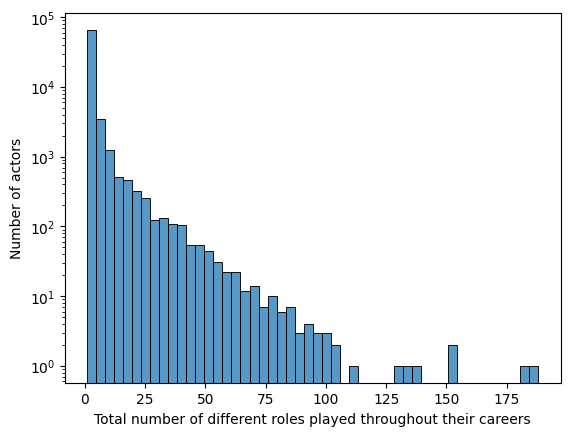

In [53]:
nb_roles = character_df.groupby(['actor_name', 'character']).size().reset_index(name='role_count')

nb_roles = nb_roles.groupby('actor_name').size().reset_index(name='role_count')
sns.histplot(actor_total_roles['total_role_count'], bins=50, log=True, kde=False)
plt.ylabel("Number of actors")
plt.xlabel("Total number of different roles played throughout their careers")
plt.show()

We could delve into the details of each roles but this dataset might have missing values concerning characters played. Let's check :

C:\Users\malou\AppData\Local\Temp\ipykernel_15648\3249113460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.index, y=missing_percent.values, palette="Reds")


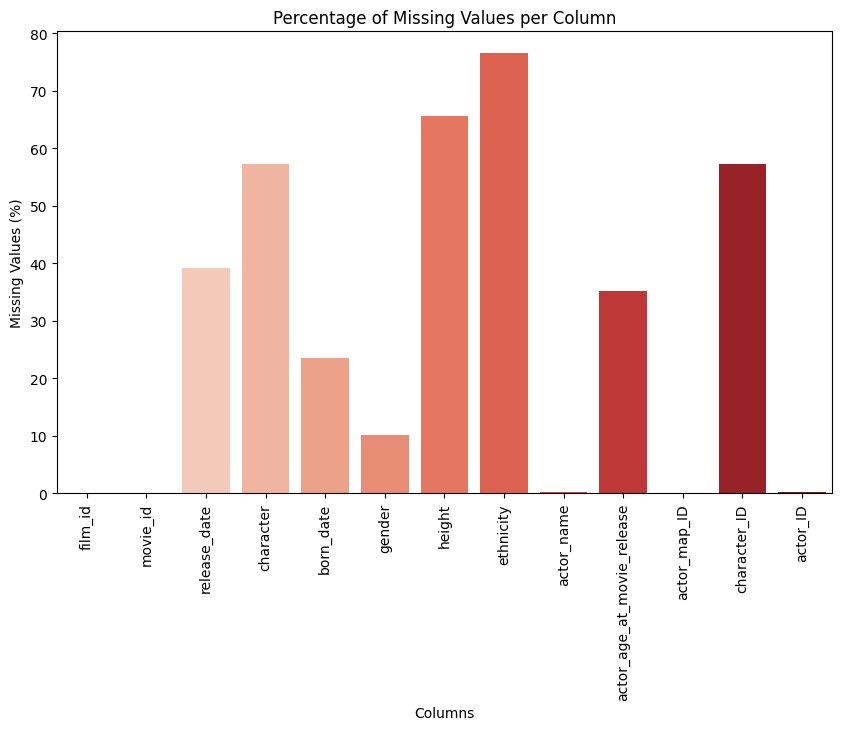

In [54]:
missing_percent = (character_df.isna().mean() * 100)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percent.index, y=missing_percent.values, palette="Reds")
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Values (%)')
plt.title('Percentage of Missing Values per Column')
plt.show()

Indeed, the proportion of missing values concerning missing characters is way above 50% so is it relevant to pursue this analysis ? 